# Лабораторная работа №2

Цель - разработать и оценить классификатор, прогнозирующий вероятность прекращения сотрудничества клиента с банком

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
!gdown 1a5czrPv-83QHP-cvUrSK-AuNTKRxekW9

Downloading...
From: https://drive.google.com/uc?id=1a5czrPv-83QHP-cvUrSK-AuNTKRxekW9
To: /content/Bank_data.csv
100% 710k/710k [00:00<00:00, 161MB/s]


In [ ]:
data_path = "/content/Bank_data.csv"

In [ ]:
data = pd.read_csv(data_path)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


# 1 Предобработка данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Обработка пропусков

<Axes: >

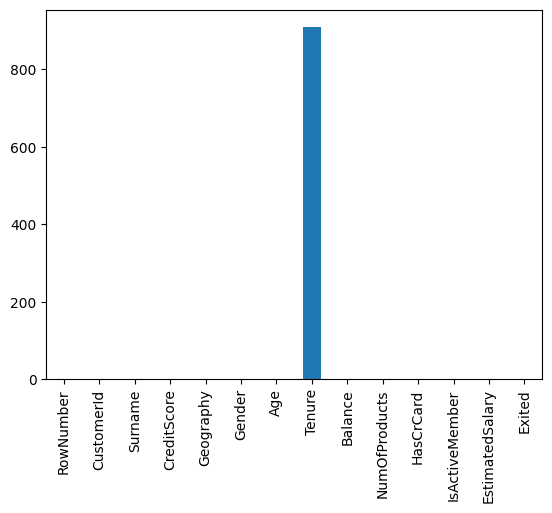

In [ ]:
data.isna().sum().plot(kind="bar")

### `Tenure`

Tenure - пропусков не так много и имеет достаточно равномерное распределние, заполнине медианой или округленным средним (так как признак дискретный), создаст пики ~точеные~. Мне кажется лучше заполнить случайным значением от 0 до 10

In [ ]:
data.loc[data.Tenure.isna(), "Tenure"] = np.random.randint(0, 10, data.Tenure.isna().sum())

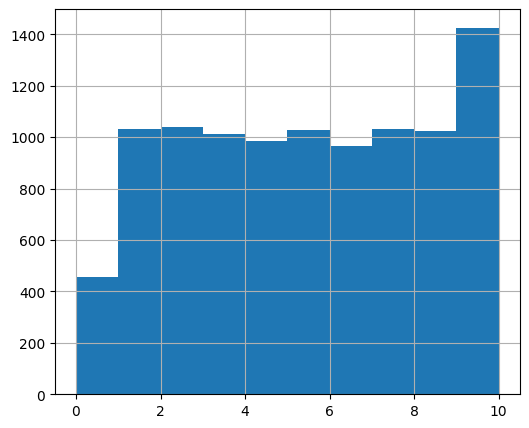

In [ ]:
data.Tenure.hist(figsize=(6, 5))
plt.show()

In [ ]:
data.Tenure = data.Tenure.astype(np.int64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Обработка выбросов и аномалий


Удалим ненужную информацию, и взглянем на распределение признаков

In [ ]:
col_to_drop = [
    "CustomerId",
    "Surname",
    "RowNumber"
]

In [ ]:
data = data.drop(col_to_drop, axis=1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

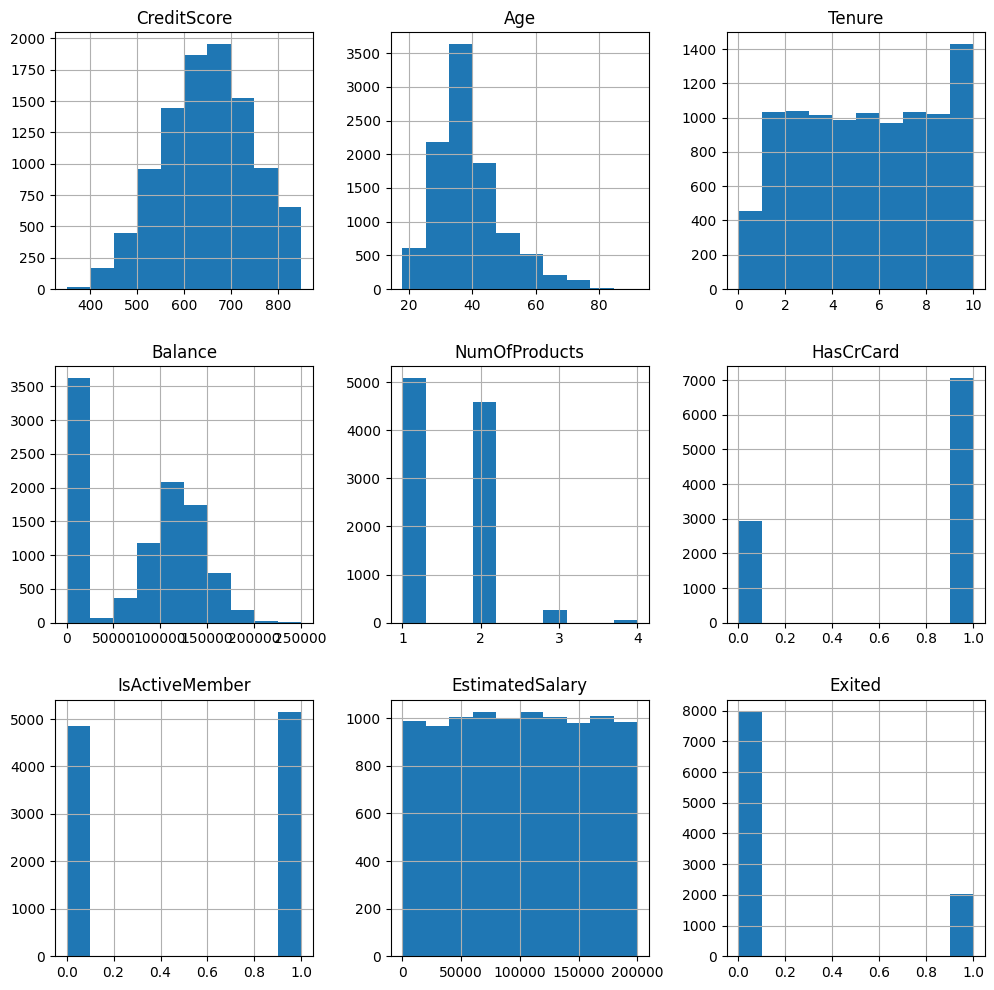

In [ ]:
data.hist(figsize=(12, 12))
plt.show()

### Age - Tenure < 14

In [ ]:
data[(data.Age - data.Tenure) < 14]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
69,675,France,Female,21,8,98373.26,1,1,0,18203.00,0
389,544,France,Female,21,10,161525.96,2,1,0,9262.77,0
410,709,Spain,Male,23,10,0.00,2,0,0,129590.18,0
1383,571,France,Female,23,10,151097.28,1,0,1,17163.75,0
1460,578,France,Male,23,10,88980.32,1,1,1,125222.36,0
...,...,...,...,...,...,...,...,...,...,...,...
9782,509,France,Male,18,7,102983.91,1,1,0,171770.58,0
9796,642,Germany,Male,22,9,111812.52,2,1,1,183045.46,0
9888,637,France,Female,21,10,125712.20,1,0,0,175072.47,0
9932,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0


## Дубликаты

дубликатов нет

In [ ]:
data[data.duplicated(keep=False)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## Распределение целевой переменной

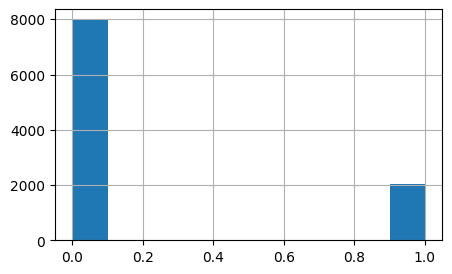

In [ ]:
data.Exited.hist(figsize = (5, 3))
plt.show()

Целевая переменная несбалансированна в своих значениях 4 : 1 случаев когда клиент остался на обслуживании у банка

In [ ]:
tmp = data[["Tenure", "Exited"]].groupby("Tenure").value_counts().reset_index()

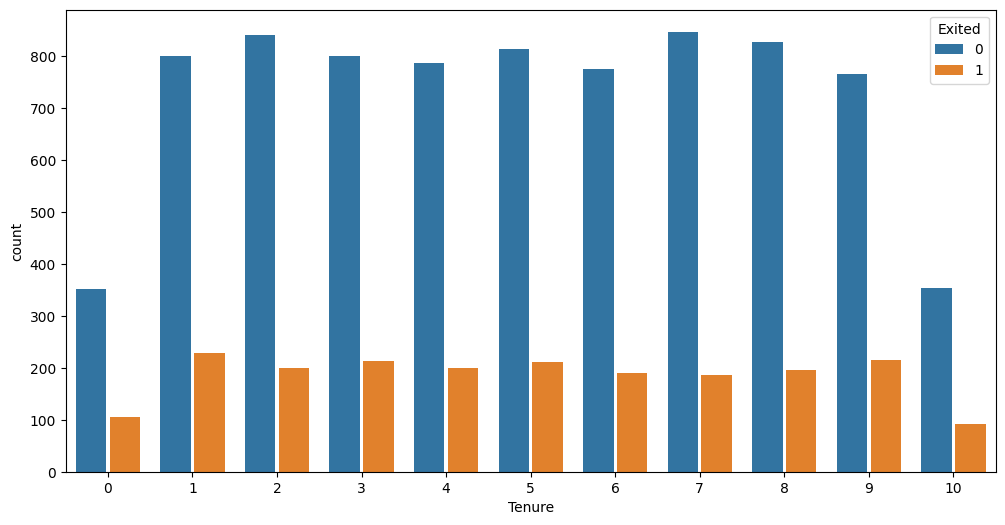

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(tmp, x="Tenure", y="count", hue="Exited", gap=0.1)
plt.show()

 ## Кодирование категориальных значений

In [ ]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_columns = data.select_dtypes([np.number]).drop("Exited", axis=1).columns
cat_columns = list(set(data.columns) - set(num_columns))
display(num_columns, cat_columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

['Exited', 'Gender', 'Geography']

In [ ]:
num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_columns = ['Geography', 'Exited', 'Gender', 'IsActiveMember', 'HasCrCard']

In [ ]:
enc = OneHotEncoder(sparse_output=False)
out = pd.DataFrame(enc.fit_transform(data[["Geography", "Gender"]]))
out.columns = enc.get_feature_names_out()

In [ ]:
out

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


In [ ]:
data = data.join(out).drop(["Geography", "Gender"], axis=1)

In [ ]:
data.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0


# 2 Обучение базовой модели

## Разбиение на train, test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X, Y = data.drop("Exited", axis=1), data["Exited"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=111003)

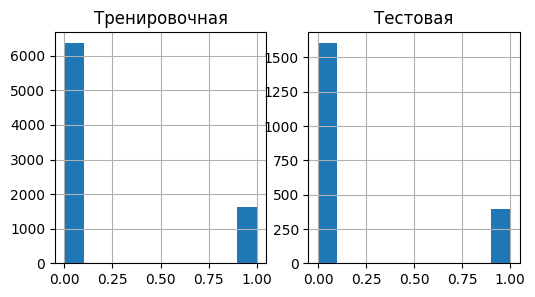

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
y_train.hist(ax=ax[0]).set_title("Тренировочная")
y_test.hist(ax=ax[1]).set_title("Тестовая")
plt.show()

## Нормализация

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
996,1.659405,0.483394,-0.679842,-1.227369,0.819764,0,1,-0.373962,0.0,0.0,1.0,0.0,1.0
8281,-0.863956,0.102675,1.392188,-0.768873,-0.911065,1,1,-0.082583,0.0,0.0,1.0,0.0,1.0
7900,1.390522,1.435191,-1.370518,-1.227369,0.819764,1,0,-0.955395,0.0,0.0,1.0,1.0,0.0
8563,-0.750198,0.578574,-1.370518,1.150776,-0.911065,1,0,0.759345,1.0,0.0,0.0,0.0,1.0
9912,0.521824,-0.468403,0.356173,0.500703,-0.911065,1,1,0.340228,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,0.480457,0.388214,1.046850,0.427547,-0.911065,1,0,-0.575412,0.0,1.0,0.0,0.0,1.0
5655,0.459774,2.291808,-1.370518,1.112400,-0.911065,1,1,0.467837,0.0,0.0,1.0,0.0,1.0
2102,1.080273,-0.563583,0.356173,0.221919,0.819764,1,1,-0.999121,0.0,1.0,0.0,1.0,0.0
8360,0.366699,-0.563583,1.392188,1.043827,0.819764,0,1,1.468377,0.0,1.0,0.0,0.0,1.0


## `LogisticRegression`

In [ ]:
model = LogisticRegression(max_iter=10001)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10001)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(acc, f1, roc_auc, sep="\n")

0.8145
0.30393996247654786
0.5848597796009056


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1603
           1       0.60      0.20      0.30       397

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000



Базовая модель дает очень низкое качество предсказания, `roc-auc` - 0.58 чуть лучше чем случайное предсказание.

Из за дисбаланса модель научилась хорошо определять `0` класс - `recall: 0.97`, и не умеет находить `1` класс - `recall: 0.2`

При этом много объектов `1` класса, были отнесены к `0`, что видно по `precision (1): 0.6`

Воспользуемся основными способами устранения дисбаланса в классах

# 3 Борьба с дисбалансом классов

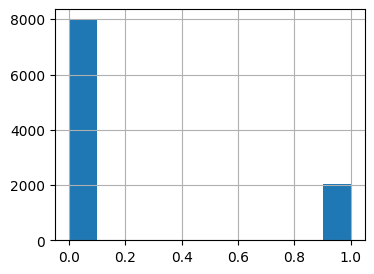

In [ ]:
Y.hist(figsize=(4,3))
plt.show()

## `Oversampling`



In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()
X, Y = ros.fit_resample(data.drop("Exited", axis=1), data["Exited"])

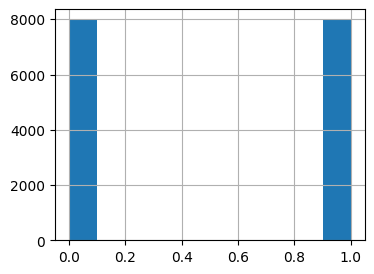

In [ ]:
Y.hist(figsize=(4,3))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=111003)

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
X_train_scaled[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test_scaled[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
10635,-0.336614,2.335255,-1.364905,0.876945,-0.760709,1,0,1.435879,1.0,0.0,0.0,1.0,0.0
15732,0.519086,-0.112601,-0.331881,1.084514,-0.760709,1,0,1.539255,0.0,1.0,0.0,1.0,0.0
7950,-1.355304,-0.771639,1.734166,0.925956,-0.760709,1,1,0.458773,0.0,1.0,0.0,1.0,0.0
374,0.692263,-0.583343,0.701142,-0.384794,0.726848,1,1,1.239346,0.0,1.0,0.0,0.0,1.0
12723,1.262729,0.546437,-1.020563,0.587281,3.701960,1,1,0.730763,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,0.376469,-0.771639,1.389825,0.976022,0.726848,0,1,1.439263,0.0,1.0,0.0,0.0,1.0
7201,0.407030,-1.054084,0.012460,0.890129,-0.760709,1,1,-1.015783,0.0,1.0,0.0,1.0,0.0
13479,-0.387548,0.734734,1.389825,0.545030,0.726848,1,1,0.655634,0.0,1.0,0.0,1.0,0.0
11652,-1.834088,0.640585,0.012460,-1.338267,-0.760709,1,0,1.033341,1.0,0.0,0.0,1.0,0.0


### Обучение моделей

#### `LogisticRegression`

In [ ]:
OS_model = LogisticRegression(max_iter=1000)

In [ ]:
OS_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_OS = OS_model.predict(X_test_scaled)

In [ ]:
acc = accuracy_score(y_test, y_pred_OS)
f1 = f1_score(y_test, y_pred_OS)
roc_auc = roc_auc_score(y_test, y_pred_OS)
print(acc, f1, roc_auc, sep="\n")

0.709353421217828
0.7035851472471191
0.7092816046658259


In [ ]:
print(classification_report(y_test, y_pred_OS))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1600
           1       0.71      0.69      0.70      1586

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



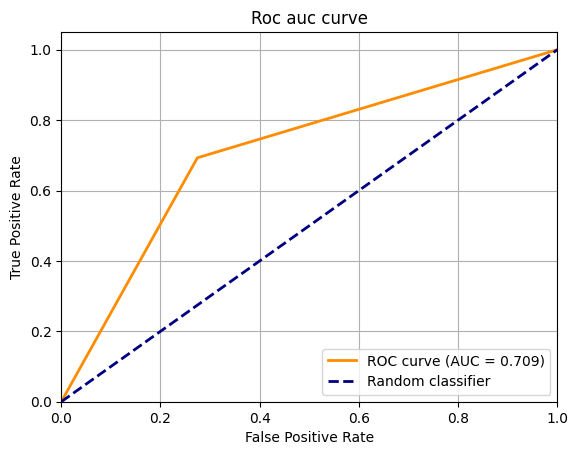

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, y_pred_OS, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### `XGBoost`

In [ ]:
from xgboost import XGBRFClassifier

In [ ]:
xgmodel = XGBRFClassifier()

In [ ]:
xgmodel.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [ ]:
xg_pred = xgmodel.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, xg_pred)
f1 = f1_score(y_test, xg_pred)
roc_auc = roc_auc_score(y_test, xg_pred)
print(acc, f1, roc_auc, sep="\n")

0.7878217200251099
0.7859404686510449
0.7877983133669608


In [ ]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1600
           1       0.79      0.78      0.79      1586

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



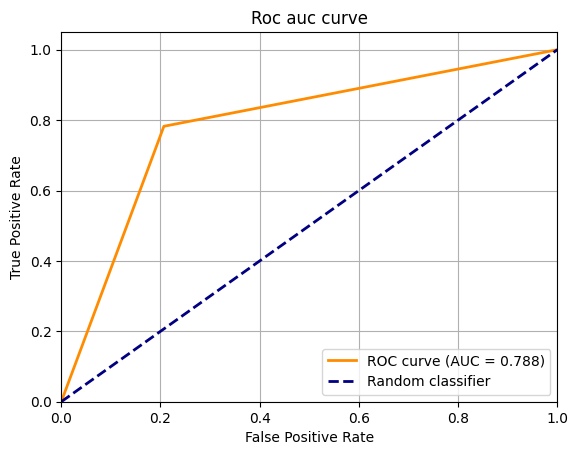

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, xg_pred, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### `DecisionTree`

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
d = {key: value for key, value in zip(dt.feature_names_in_, dt.feature_importances_)}
d

{'CreditScore': np.float64(0.05527350178259469),
 'Age': np.float64(0.3542548927180737),
 'Tenure': np.float64(0.02205943618928703),
 'Balance': np.float64(0.13236968933664278),
 'NumOfProducts': np.float64(0.221100029283806),
 'HasCrCard': np.float64(0.006238225599514035),
 'IsActiveMember': np.float64(0.06475727775744657),
 'EstimatedSalary': np.float64(0.08712046112005349),
 'Geography_France': np.float64(0.0012859920752167923),
 'Geography_Germany': np.float64(0.03089667812919748),
 'Geography_Spain': np.float64(0.002974677260758318),
 'Gender_Female': np.float64(0.012281711551582336),
 'Gender_Male': np.float64(0.009387427195826812)}

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
roc_auc = roc_auc_score(y_test, dt_pred)
print(acc, f1, roc_auc, sep="\n")

0.8182674199623352
0.8210200927357032
0.8183508039092056


In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1600
           1       0.87      0.98      0.92      1586

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186



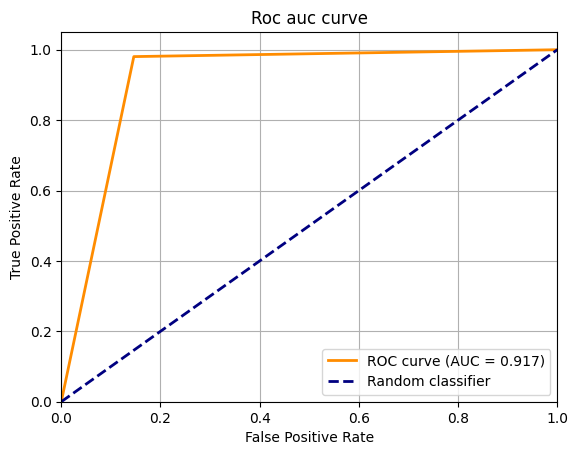

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, dt_pred, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay

## `Undersampling`

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()
X, Y = rus.fit_resample(data.drop("Exited", axis=1), data["Exited"])

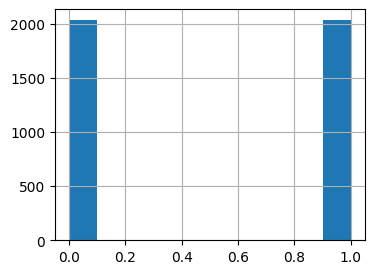

In [ ]:
Y.hist(figsize=(4,3))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=111003)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
X_train_scaled[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test_scaled[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5124,721,46,7,137933.39,1,1,1,67976.57,0.0,0.0,1.0,1.0,0.0
5093,650,55,2,140891.46,3,1,1,179834.45,0.0,1.0,0.0,1.0,0.0
706,626,35,4,88109.81,1,1,1,32825.50,0.0,1.0,0.0,0.0,1.0
9528,739,34,9,0.00,1,1,0,60584.33,1.0,0.0,0.0,0.0,1.0
6097,575,47,9,107915.94,2,1,1,63452.18,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,674,28,3,0.00,1,1,0,51536.99,1.0,0.0,0.0,1.0,0.0
5099,595,45,9,106000.12,1,0,0,191448.96,0.0,1.0,0.0,1.0,0.0
6397,550,33,9,72788.03,1,1,1,103608.06,0.0,0.0,1.0,1.0,0.0
6891,754,48,9,141819.02,1,1,0,93550.53,0.0,1.0,0.0,1.0,0.0


### Обучение моделей

#### `LogisticRegression`

In [ ]:
US_model = LogisticRegression(max_iter=1000)

In [ ]:
US_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_US = US_model.predict(X_test_scaled)

In [ ]:
acc = accuracy_score(y_test, y_pred_US)
f1 = f1_score(y_test, y_pred_US)
roc_auc = roc_auc_score(y_test, y_pred_US)
print(acc, f1, roc_auc, sep="\n")

0.7030674846625767
0.6889460154241646
0.7023456522263205


In [ ]:
print(classification_report(y_test, y_pred_US))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       419
           1       0.70      0.68      0.69       396

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815



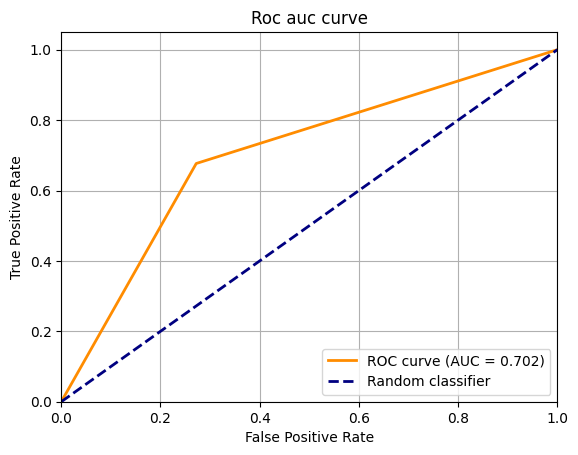

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, y_pred_US, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### `XGBoost`

In [ ]:
xgmodel_us = XGBRFClassifier()

In [ ]:
xgmodel_us.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [ ]:
xg_pred_us = xgmodel_us.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, xg_pred_us)
f1 = f1_score(y_test, xg_pred_us)
roc_auc = roc_auc_score(y_test, xg_pred_us)
print(acc, f1, roc_auc, sep="\n")

0.7656441717791411
0.7541827541827542
0.7649375617752706


In [ ]:
print(classification_report(y_test, xg_pred_us))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       419
           1       0.77      0.74      0.75       396

    accuracy                           0.77       815
   macro avg       0.77      0.76      0.77       815
weighted avg       0.77      0.77      0.77       815



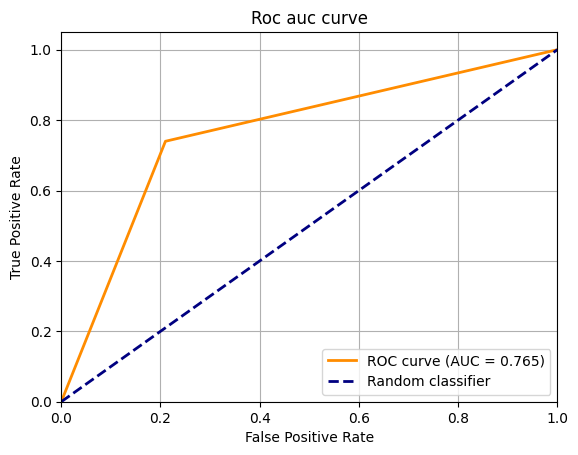

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, xg_pred_us, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### `DecisionTree`

In [ ]:
dt_us = DecisionTreeClassifier()

In [ ]:
dt_us.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred_us = dt_us.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, dt_pred_us)
f1 = f1_score(y_test, dt_pred_us)
roc_auc = roc_auc_score(y_test, dt_pred_us)
print(acc, f1, roc_auc, sep="\n")

0.7153374233128834
0.7085427135678392
0.7152491502133507


In [ ]:
print(classification_report(y_test, dt_pred_us))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       419
           1       0.70      0.71      0.71       396

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



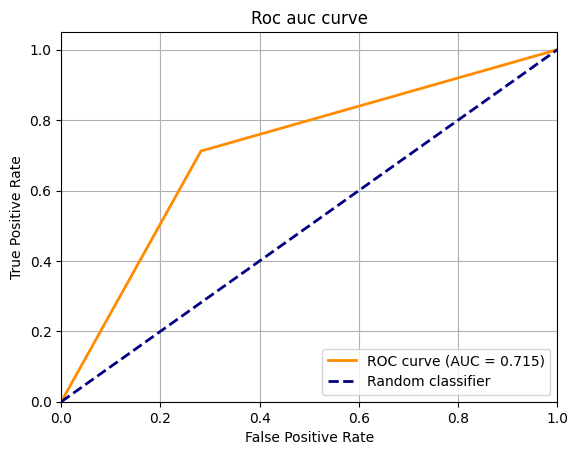

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, dt_pred_us, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## `Class Weighting`

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
X, Y = data.drop("Exited", axis=1), data["Exited"]

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)
class_weights

array([0.62790406, 2.45459008])

In [ ]:
d_weights = {key: value for key, value in zip(np.unique(Y), class_weights)}
d_weights

{np.int64(0): np.float64(0.6279040562602034),
 np.int64(1): np.float64(2.454590083456063)}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=111003)

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [ ]:
X_train_scaled[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test_scaled[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
X_train_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
996,1.659405,0.483394,-0.678485,-1.227369,0.819764,0,1,-0.373962,0.0,0.0,1.0,0.0,1.0
8281,-0.863956,0.102675,0.700375,-0.768873,-0.911065,1,1,-0.082583,0.0,0.0,1.0,0.0,1.0
7900,1.390522,1.435191,-1.367916,-1.227369,0.819764,1,0,-0.955395,0.0,0.0,1.0,1.0,0.0
8563,-0.750198,0.578574,-1.367916,1.150776,-0.911065,1,0,0.759345,1.0,0.0,0.0,0.0,1.0
9912,0.521824,-0.468403,0.355660,0.500703,-0.911065,1,1,0.340228,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,0.480457,0.388214,1.045090,0.427547,-0.911065,1,0,-0.575412,0.0,1.0,0.0,0.0,1.0
5655,0.459774,2.291808,-1.367916,1.112400,-0.911065,1,1,0.467837,0.0,0.0,1.0,0.0,1.0
2102,1.080273,-0.563583,0.355660,0.221919,0.819764,1,1,-0.999121,0.0,1.0,0.0,1.0,0.0
8360,0.366699,-0.563583,1.389805,1.043827,0.819764,0,1,1.468377,0.0,1.0,0.0,0.0,1.0


### Обучение моделей

#### `LogisticRegression`

In [ ]:
cw_model = LogisticRegression(max_iter=1000, class_weight=d_weights)

In [ ]:
cw_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={np.int64(0): np.float64(0.6279040562602034),
                                 np.int64(1): np.float64(2.454590083456063)},
                   max_iter=1000)

In [ ]:
y_pred_cw = cw_model.predict(X_test_scaled)

In [ ]:
acc = accuracy_score(y_test, y_pred_cw)
f1 = f1_score(y_test, y_pred_cw)
roc_auc = roc_auc_score(y_test, y_pred_cw)
print(acc, f1, roc_auc, sep="\n")

0.701
0.4809027777777778
0.6997710527018766


In [ ]:
print(classification_report(y_test, y_pred_cw))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1603
           1       0.37      0.70      0.48       397

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.70      0.73      2000



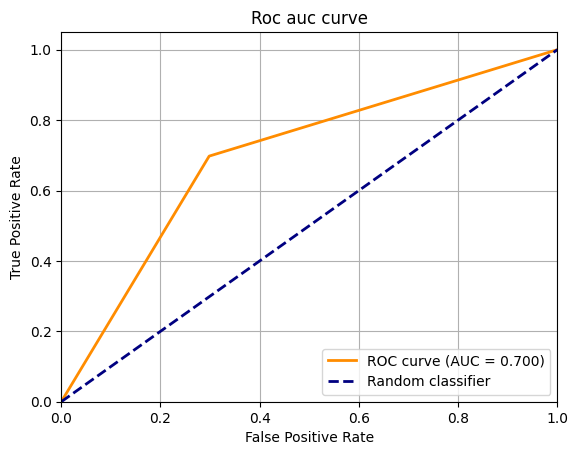

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, y_pred_cw, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### `XGBoost`

In [ ]:
from xgboost import XGBRFClassifier

In [ ]:
xgmodel_cw = XGBRFClassifier(scale_pos_weight=4, objective='binary:logistic', random_state=111003) # 8000 / 2000

In [ ]:
xgmodel_cw.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=111003, ...)

In [ ]:
xg_pred_cw = xgmodel_cw.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, xg_pred_cw)
f1 = f1_score(y_test, xg_pred_cw)
roc_auc = roc_auc_score(y_test, xg_pred_cw)
print(acc, f1, roc_auc, sep="\n")

0.7915
0.5907752698724239
0.7789684329288127


In [ ]:
print(classification_report(y_test, xg_pred_cw))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1603
           1       0.48      0.76      0.59       397

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



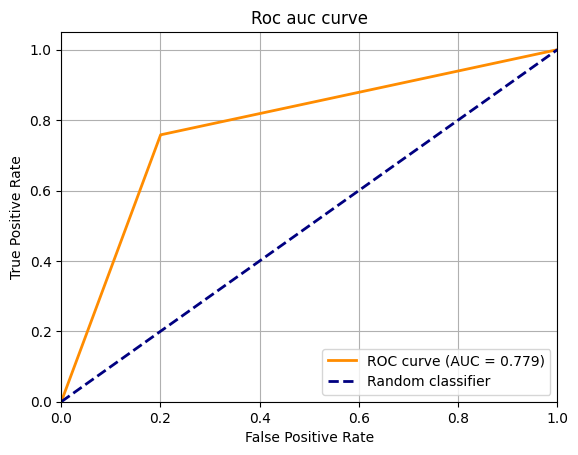

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, xg_pred_cw, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### `DecisionTree`

In [ ]:
dt_cw = DecisionTreeClassifier(class_weight=d_weights)

In [ ]:
dt_cw.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={np.int64(0): np.float64(0.6279040562602034),
                                     np.int64(1): np.float64(2.454590083456063)})

In [ ]:
dt_pred_cw = dt_cw.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, dt_pred_cw)
f1 = f1_score(y_test, dt_pred_cw)
roc_auc = roc_auc_score(y_test, dt_pred_cw)
print(acc, f1, roc_auc, sep="\n")

0.7995
0.489171974522293
0.6806782308360741


In [ ]:
print(classification_report(y_test, dt_pred_cw))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1603
           1       0.49      0.48      0.49       397

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



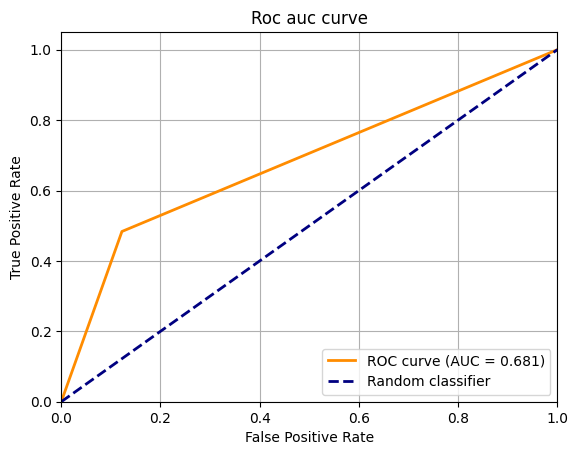

In [ ]:
fpr, tpr, thrs = roc_curve(y_test, dt_pred_cw, pos_label=1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc auc curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Использование модели в бизнес процессах


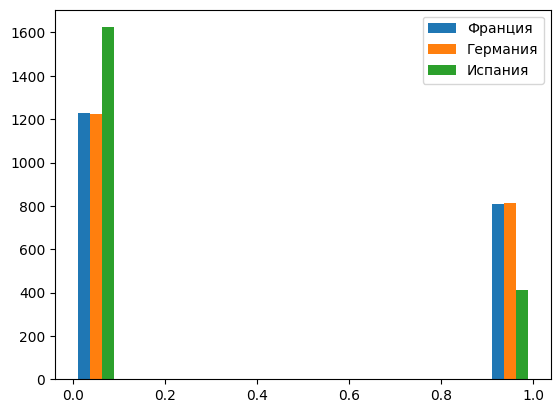

In [ ]:
plt.hist(data[data.Exited==1][["Geography_France", "Geography_Germany", "Geography_Spain"]], label=["Франция", "Германия", "Испания"])
plt.legend()
plt.show()

Из Франции и Германии уходит больше людей

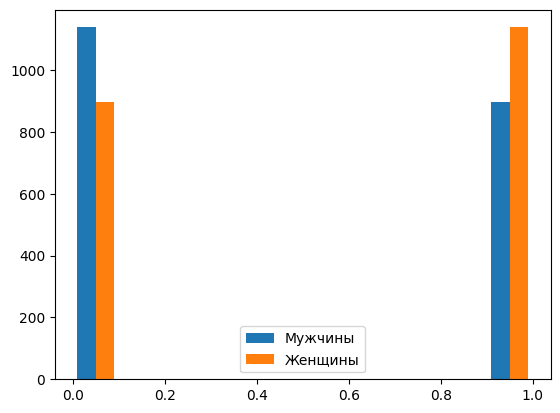

In [ ]:
plt.hist(data[data.Exited==1][["Gender_Male", "Gender_Female"]], label=["Мужчины", "Женщины"])
plt.legend()
plt.show()

Женщин уходит больше

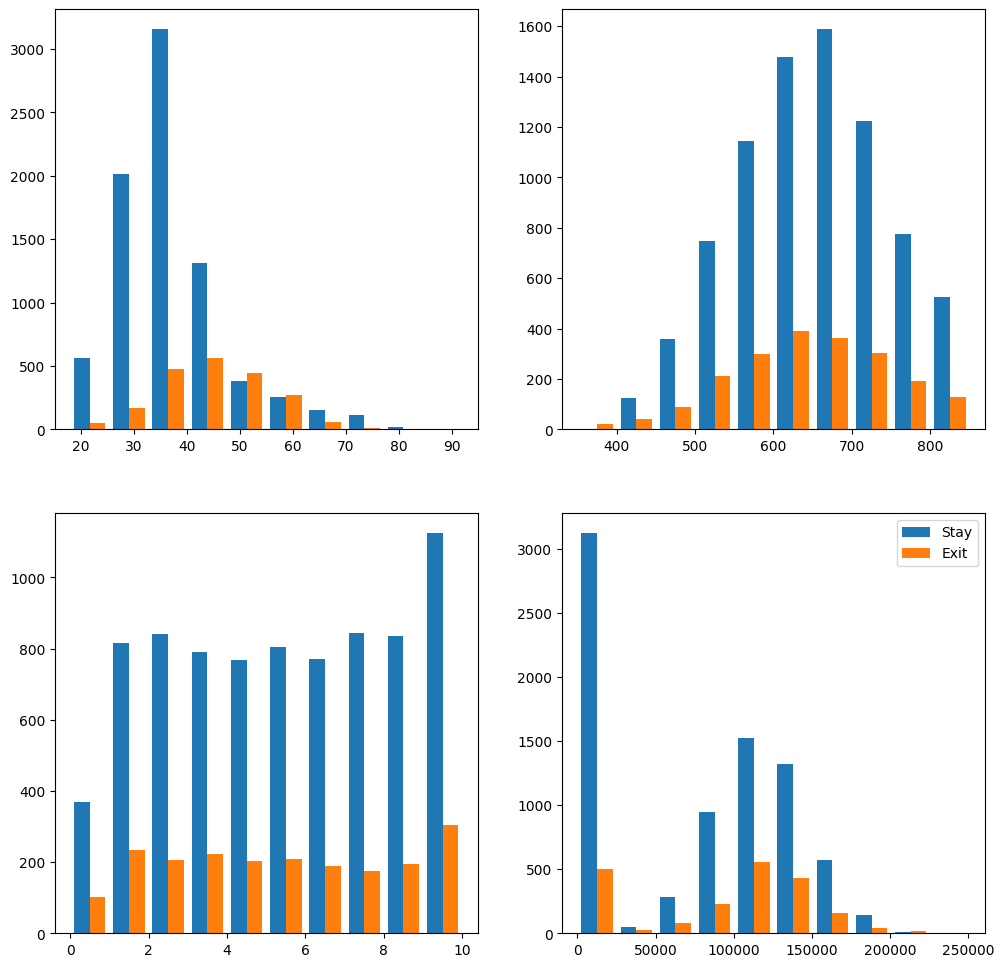

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flatten()
ax[0].hist([data[data.Exited==0]["Age"], data[data.Exited==1]["Age"]], label=["Stay", "Exit"])
ax[1].hist([data[data.Exited==0]["CreditScore"], data[data.Exited==1]["CreditScore"]], label=["Stay", "Exit"])
ax[2].hist([data[data.Exited==0]["Tenure"], data[data.Exited==1]["Tenure"]], label=["Stay", "Exit"])
ax[3].hist([data[data.Exited==0]["Balance"], data[data.Exited==1]["Balance"]], label=["Stay", "Exit"])
plt.legend()
plt.show()

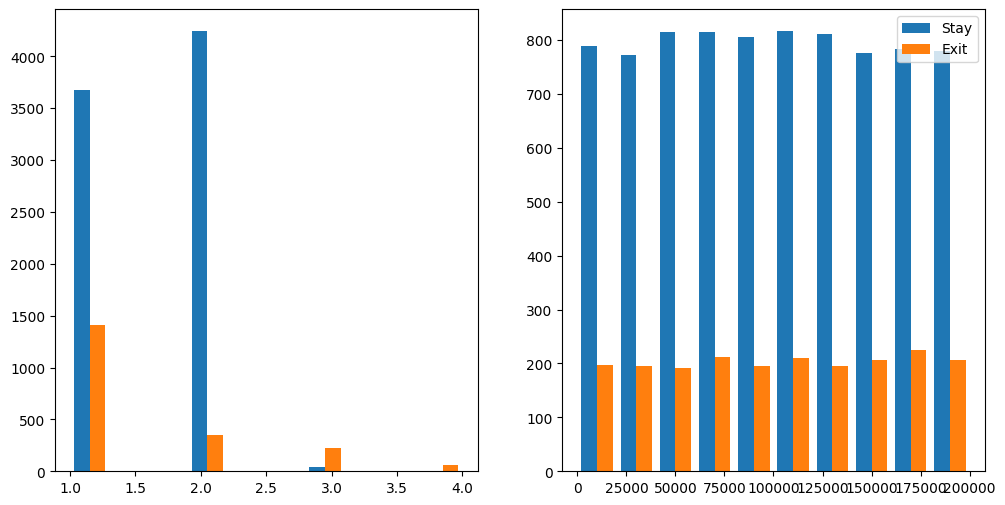

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax = ax.flatten()
ax[0].hist([data[data.Exited==0]["NumOfProducts"], data[data.Exited==1]["NumOfProducts"]], label=["Stay", "Exit"])
ax[1].hist([data[data.Exited==0]["EstimatedSalary"], data[data.Exited==1]["EstimatedSalary"]], label=["Stay", "Exit"])
plt.legend()
plt.show()

Выделим несколько интересных групп, где больше всего людей уходят:

- 35 < возвраст < 55;
- 550 < кредитный рейтинг < 750;
- с 1 банковским продуктом

In [ ]:
age_filter = data[(data.Age > 35) & (data.Age < 55) & (data.Exited == 1)]
credit_score_filter = data[(data.CreditScore > 550) & (data.CreditScore < 750) & (data.Exited == 1)]
one_prod_filter = data[(data.NumOfProducts == 1) & (data.Exited == 1)]

data.loc[age_filter.index.intersection(one_prod_filter.index).intersection(credit_score_filter.index)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
47,637,39,9,137843.80,1,1,1,117622.80,1,0.0,1.0,0.0,1.0,0.0
53,655,41,3,125561.97,1,0,0,164040.94,1,0.0,1.0,0.0,0.0,1.0
54,601,42,1,98495.72,1,1,0,40014.76,1,0.0,1.0,0.0,0.0,1.0
138,584,48,2,213146.20,1,1,0,75161.25,1,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,692,43,10,118588.83,1,1,1,161241.65,1,0.0,1.0,0.0,1.0,0.0
9962,702,44,9,0.00,1,0,0,59207.41,1,0.0,0.0,1.0,0.0,1.0
9982,655,46,7,137145.12,1,1,0,115146.40,1,0.0,1.0,0.0,1.0,0.0
9991,597,53,4,88381.21,1,1,0,69384.71,1,1.0,0.0,0.0,1.0,0.0


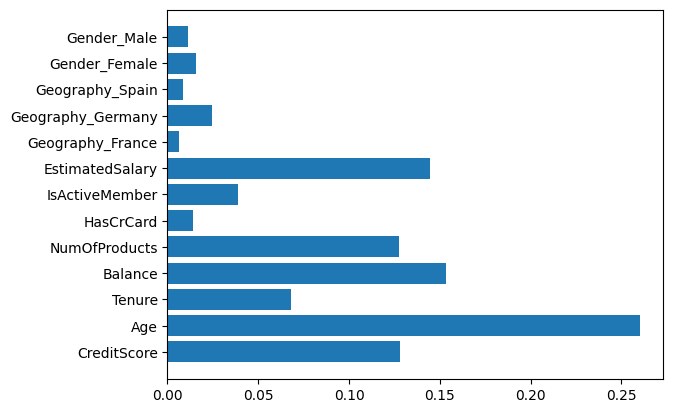

In [ ]:
plt.barh(y=d.keys(), width=d.values())
plt.show()

Самые важные признаки это возвраст

## Результаты

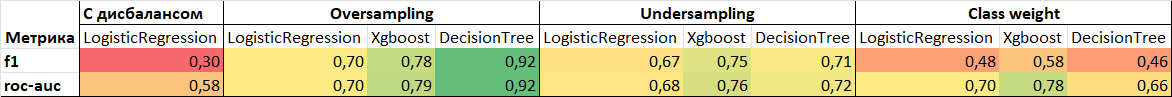


Самая результативная модель - DecisionTree с применением oversampling
```
f1_score: 0.93
roc_auc: 0.92
```